In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_excel('everytime crawing main.xlsx', header = None)
data.rename(columns = {
    0 : 'vote', 1 : 'text', 2 : 'date', 3 : 'board'
},inplace = True)

In [3]:
data.info()
# 엥 널값이 있네

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    600 non-null    int64 
 1   text    599 non-null    object
 2   date    600 non-null    object
 3   board   600 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


In [4]:
data[data['text'].isnull()==True]
# 사진만 있었나?

,vote,text,date,board
114,13,NaN,02/04 21:24,새내기게시판


In [5]:
data
# text는 전처리가 필요할거같네, date는 날짜형태로 바꿔야겠다

,vote,text,date,board
0,26,"‼️야, 너도 집에서 책 볼 수 있어‼️<순천향대 중앙도서관 e-book 활용하기>...",03/04 21:59,새내기게시판
1,69,네이버 붙었다ㅜㅜ넘 좋아오퍼레터 빨리 받아서 퇴사 통보하고 싶네ㅎㅎㅎㅎㅎㅎㅎ,03/04 12:26,졸업생게시판
2,11,💛나도 헷갈려서 올리는 교양 인간사랑 정리 글💛✔️ 평가방법15주차 중 출석이 2/...,03/03 16:30,새내기게시판
3,34,모솔인사람,03/03 23:52,비밀게시판
4,30,체대 싸잡아서 욕하는 거 아니고체대생이라서 체대라고 올리는 거니까 ㅊㄷㅅ여러분들 풀...,03/03 15:51,자유게시판
...,...,...,...,...
595,495,2020년 2학기. 여전히 코로나가 종식되지 않은 상황이라면2학기 수업은 전체 비대...,20/10/06 16:56,자유게시판
596,16,ㅈㄱㄴ,20/10/05 20:25,자유게시판
597,25,나는야 의지박약,20/10/05 22:22,비밀게시판
598,15,교수님들이랑 학교랑 왜 소통이 잘 안될까?? 당장 이번 추석만 해도 공휴일에 강의를...,20/10/04 18:24,자유게시판


In [6]:
# 텍스트 전처리
stopwords = pd.read_csv('한국어불용어100.txt',sep = '\t', header = None)[0].to_list()

def alpha_num(text):
    import re
    
    return re.sub(r'[^가-힣A-Za-z0-9 ]', '', str(text))

def remove_stopwords(text):
    
    from konlpy.tag import Okt
    okt = Okt()
    
    final_text = []
    for i in okt.nouns(text):
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)


data['text'] = data['text'].apply(alpha_num).apply(remove_stopwords)
data

,vote,text,date,board
0,26,책 볼 순천향대 중앙 도서관 활용 시국 킹 천향 대의 도서관 오지 후배 질문 댓글,03/04 21:59,새내기게시판
1,69,네이버 레터 퇴사 통보,03/04 12:26,졸업생게시판
2,11,교양 인간 사랑 정리 글 평가 방법 주차 출석 기말고사 제출 함 출석 기말고사 제출...,03/03 16:30,새내기게시판
3,34,솔,03/03 23:52,비밀게시판
4,30,체 욕 거 고체 생 체 거 풀 원룸 담배 피 비 흡연 어쩌 곤 가용 흡연 동생 언니...,03/03 15:51,자유게시판
...,...,...,...,...
595,495,학기 코로나 종식 상황 라면 학기 수업 전체 비 대면 학기 마찬가지 일정 퍼센티지 ...,20/10/06 16:56,자유게시판
596,16,,20/10/05 20:25,자유게시판
597,25,의지 박약,20/10/05 22:22,비밀게시판
598,15,교수 학교 소통 추석 해도 공휴일 강의 식 진행 가이드라인 교수 수업 교수 학교 느...,20/10/04 18:24,자유게시판


In [7]:
# 날짜 전처리
# 구체적인 시간(시, 분)은 크게 필요 없는듯 하다.
def time_pp(date):
    
    remove_time = []
    
    for i in date:
        a = i.split()[0]
        remove_time.append(a)
        
    return remove_time

def convert_datetime(date):
    from datetime import datetime
    
    convert_date = []
    
    for i in date:
        if len(i)==5:
            j = '21/'+i
            data2 = datetime.strptime(j, '%y/%m/%d').date()
            convert_date.append(data2)
            
        else:
            date2 = datetime.strptime(i, '%y/%m/%d').date()
            convert_date.append(date2)
            
    return convert_date

data['date'] = time_pp(data['date'])
data['date'] = convert_datetime(data['date'])

In [8]:
data

,vote,text,date,board
0,26,책 볼 순천향대 중앙 도서관 활용 시국 킹 천향 대의 도서관 오지 후배 질문 댓글,2021-03-04,새내기게시판
1,69,네이버 레터 퇴사 통보,2021-03-04,졸업생게시판
2,11,교양 인간 사랑 정리 글 평가 방법 주차 출석 기말고사 제출 함 출석 기말고사 제출...,2021-03-03,새내기게시판
3,34,솔,2021-03-03,비밀게시판
4,30,체 욕 거 고체 생 체 거 풀 원룸 담배 피 비 흡연 어쩌 곤 가용 흡연 동생 언니...,2021-03-03,자유게시판
...,...,...,...,...
595,495,학기 코로나 종식 상황 라면 학기 수업 전체 비 대면 학기 마찬가지 일정 퍼센티지 ...,2020-10-06,자유게시판
596,16,,2020-10-05,자유게시판
597,25,의지 박약,2020-10-05,비밀게시판
598,15,교수 학교 소통 추석 해도 공휴일 강의 식 진행 가이드라인 교수 수업 교수 학교 느...,2020-10-04,자유게시판


In [9]:
# 전체적인 전처리가 끝난듯 하니 EDA를 들어가보자
# 핫게시판 : vote를 10개 이상 받으면 핫게시판으로 이동됨

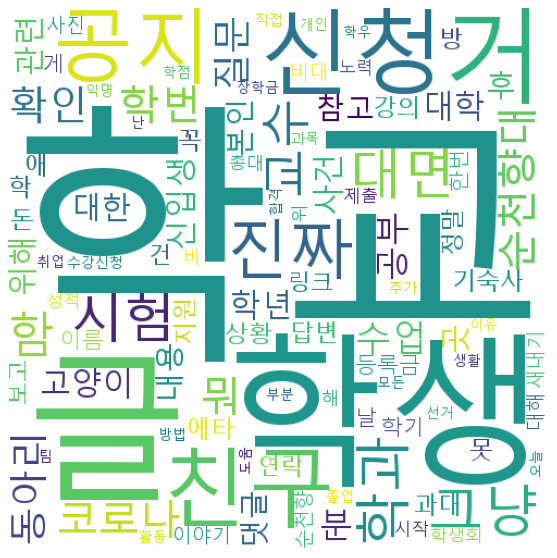

In [10]:
def counter_word(input_data):
    from collections import Counter

    word = []

    for i in input_data:
        word.append(i.split())
    word = sum(word, [])
    word_count = Counter(word)
    
    return word_count

def word_cloud(word_count):

    from wordcloud import WordCloud
    from matplotlib import font_manager,rc
    
    font_location='C:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=font_location).get_name()
    rc('font',family=font_name)
    
    f, ax = plt.subplots(figsize=(10,10))
    
    wc = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                   background_color='white',
                   width = 500,
                   height = 500,
                   max_words = 100,
                   max_font_size = 1000).generate_from_frequencies(word_count)
    
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

word_count = counter_word(data['text'])
word_cloud(word_count)

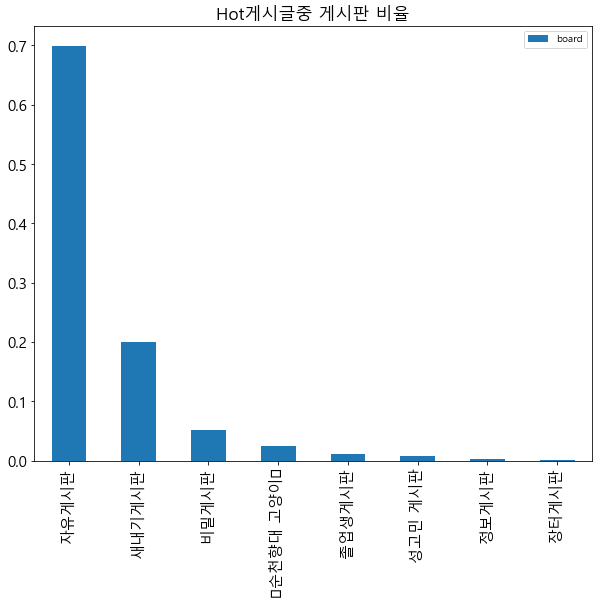

In [11]:
f, ax = plt.subplots(figsize = (10,8))
data['board'].value_counts(normalize = True).to_frame().plot(kind = 'bar',
                                            ax = ax, 
                                            fontsize = 15)
plt.title('Hot게시글중 게시판 비율',
         fontsize = 17)
plt.show()

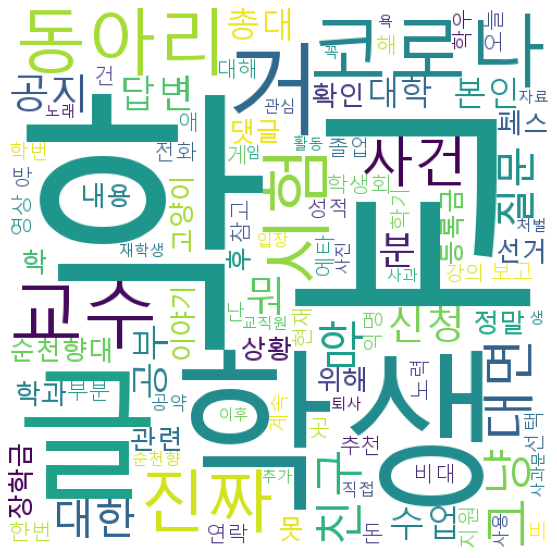

In [12]:
data_sub1 = data[data['board']=='자유게시판']

word_count = counter_word(data_sub1['text'])
word_cloud(word_count)

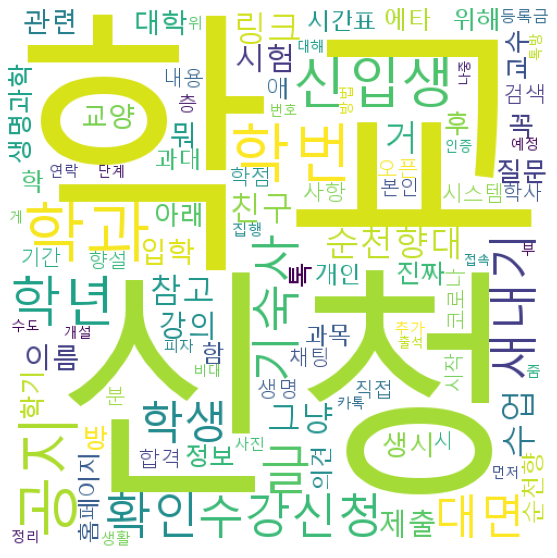

In [13]:
data_sub2 = data[data['board']=='새내기게시판']

word_count = counter_word(data_sub2['text'])
word_cloud(word_count)

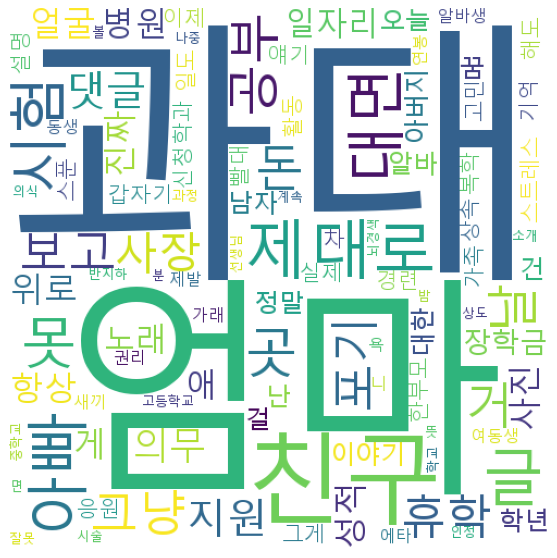

In [14]:
data_sub3 = data[data['board']=='비밀게시판']

word_count = counter_word(data_sub3['text'])
word_cloud(word_count)

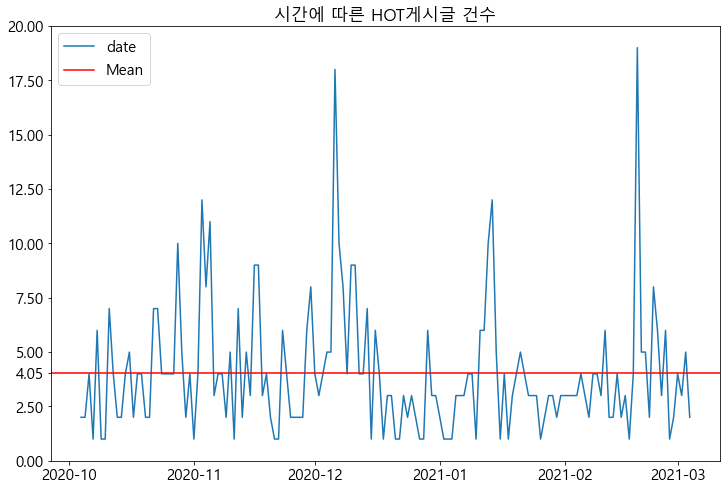

In [15]:
f,ax = plt.subplots(figsize = (12,8))

data['date'].value_counts().to_frame().plot(kind = 'line', 
                                           ax = ax,
                                           fontsize = 15)
# y축에 평균선 추가
# ------------------------
mean_count = np.mean(data['date'].value_counts())
ax.axhline(mean_count,
           label='Mean',
           color = 'red')
yticks = list(ax.get_yticks())
yticks.append(mean_count)
yticks = sorted(yticks)
ax.set_yticks(yticks)
# ---------------------------

plt.title('시간에 따른 HOT게시글 건수', fontsize = 17)
plt.legend(fontsize = 15)
plt.show()

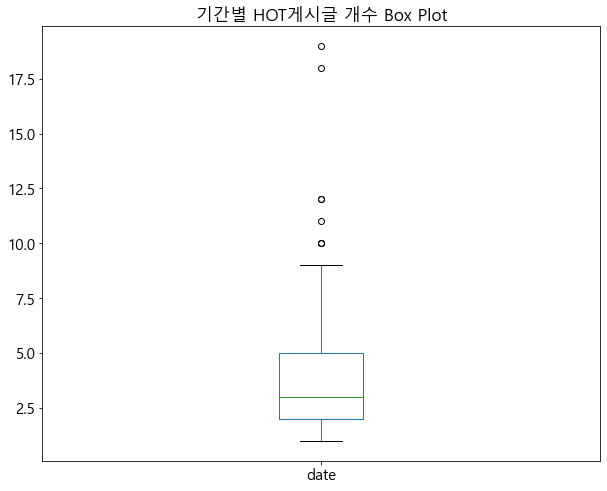

In [16]:
f, ax = plt.subplots(figsize = (10,8))
data['date'].value_counts().plot(kind = 'box',
                                fontsize = 15)

plt.title('기간별 HOT게시글 개수 Box Plot',
         fontsize = 17)
plt.show()

In [17]:
data['date'].value_counts().head()

2021-02-19    19
2020-12-06    18
2020-11-03    12
2021-01-14    12
2020-11-05    11
Name: date, dtype: int64

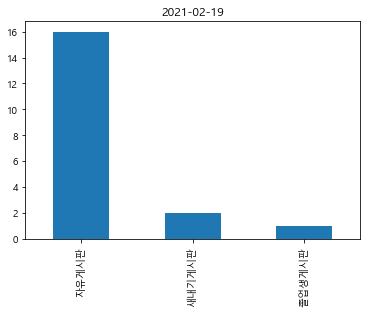

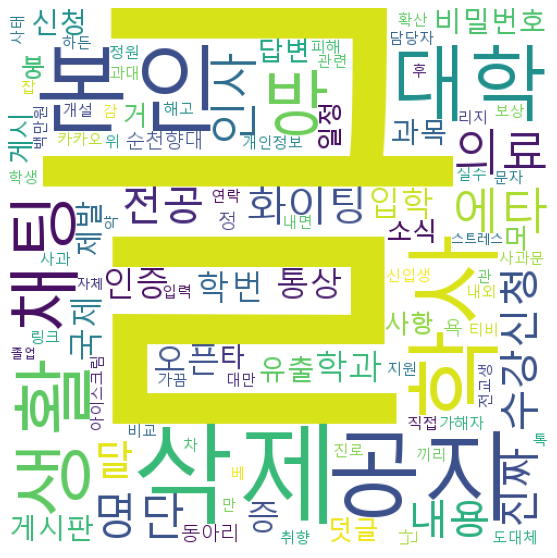

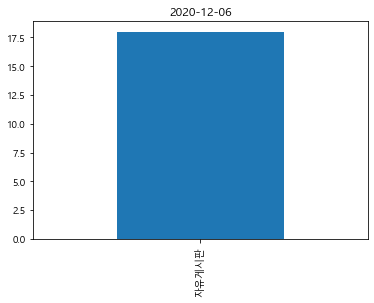

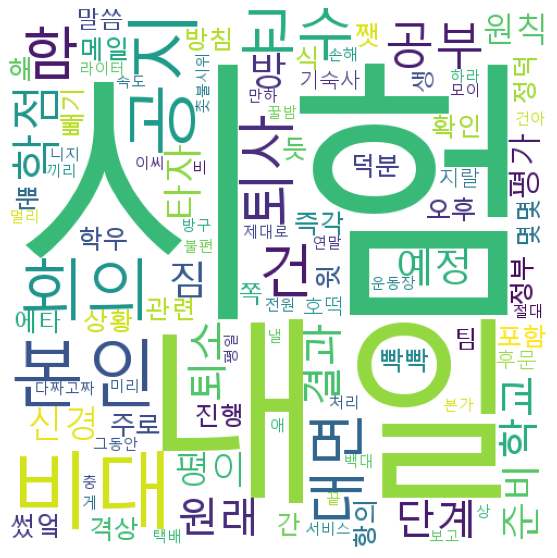

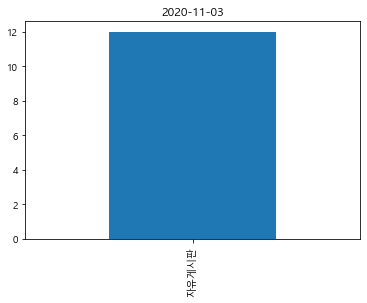

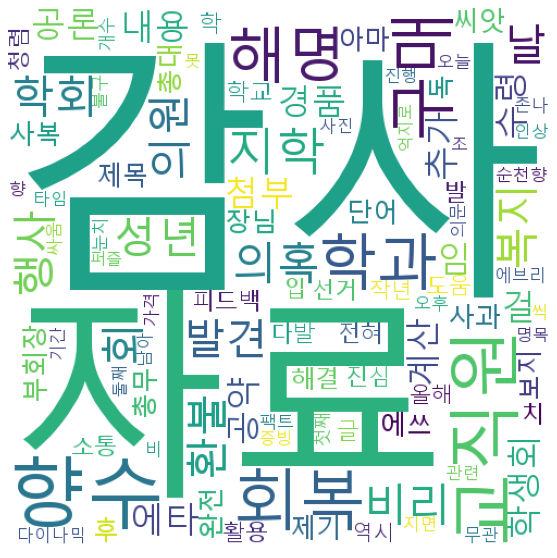

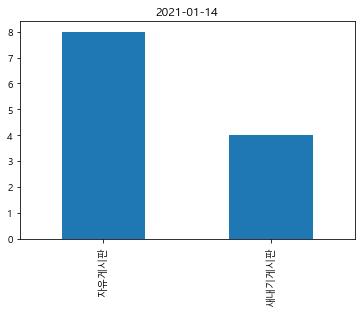

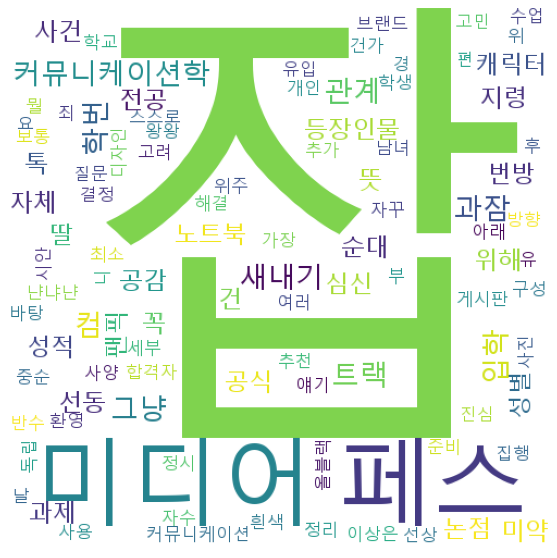

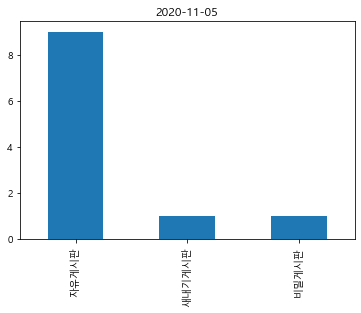

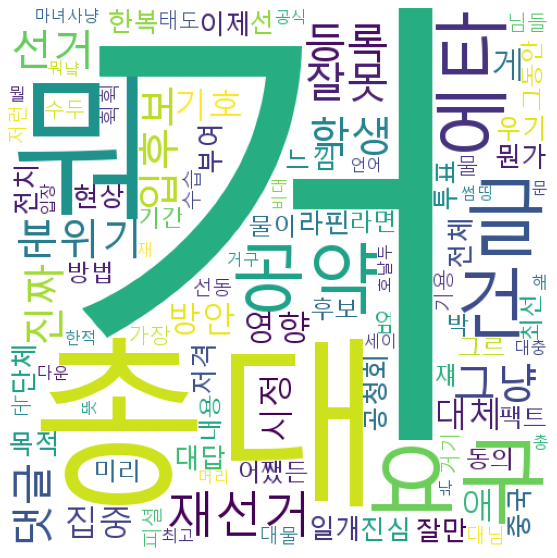

In [18]:
for i in data['date'].value_counts().head().to_frame().reset_index()['index']:
    data[data['date']==i]['board'].value_counts().plot(kind = 'bar').set_title(i)
    
    data_sub1 = data[data['date']==i]
    word_count = counter_word(data_sub1['text'])
    word_cloud(word_count)
    plt.show()

In [11]:
# Word2Vec embedding

from gensim.models import Word2Vec

word = []
for i in data['text']:
    word.append(i.split())

embedding_model = Word2Vec(word, window = 2, min_count=10, epochs = 1000,workers=-1, sg=1)

In [27]:
print(embedding_model.wv.most_similar(positive=['시험']))

[('비대', 0.31447821855545044), ('과대', 0.312885046005249), ('화장실', 0.25901883840560913), ('공식', 0.248843252658844), ('지방', 0.24795961380004883), ('인용', 0.22837775945663452), ('범죄', 0.2154766321182251), ('분위기', 0.1979798674583435), ('점수', 0.19425666332244873), ('동기', 0.18747855722904205)]
